In [1]:
'''
  Project 2- Milestone 2
  Amough Mittal and Mika Morgan
  CSCE 5210- Section 002

  Begin by creating two graphs- a large one with 50 nodes and random flows and capacities
  and a small, hardcoded, one from Figure 1 in the Project Specification.

  Starter code for the large graph, G_50, provided by Dr. Pears in Tutorial 2.
'''
import networkx as nx
import matplotlib.pyplot as plt
import random

seed=1000                                   # seed the graph for reproducibility
G_50 = nx.gnp_random_graph(50, .06)        # here we create a random binomial graph with 50 nodes and an average (expected) connectivity of 50 * .06 = 3

flows = {}
capacities = {}

for edge in G_50.edges:
  f = random.randint(4000, 10000)                   # create random number [4,000 - 10,000] to represent maximum edge flow
  flows[edge] = f                                   # add the flow to dictionary with edge as key: flow as value
  c = random.randint(max(f,6000), 12000)            # create random number [6,000 - 12,000] to represent maximum edge capacity
  capacities[edge] = c                              # add the capacity to dictionary with edge as key: capacity as value

nx.set_edge_attributes(G_50, values = flows, name = 'flow')               # set all the edge flows to the random values stored in the flow dictionary
nx.set_edge_attributes(G_50, values = capacities, name = 'capacity')      # set all the edge capacities to the random values in the capacity dictionary

<ipython-input-2-14742adb9b23>:5: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G_50)


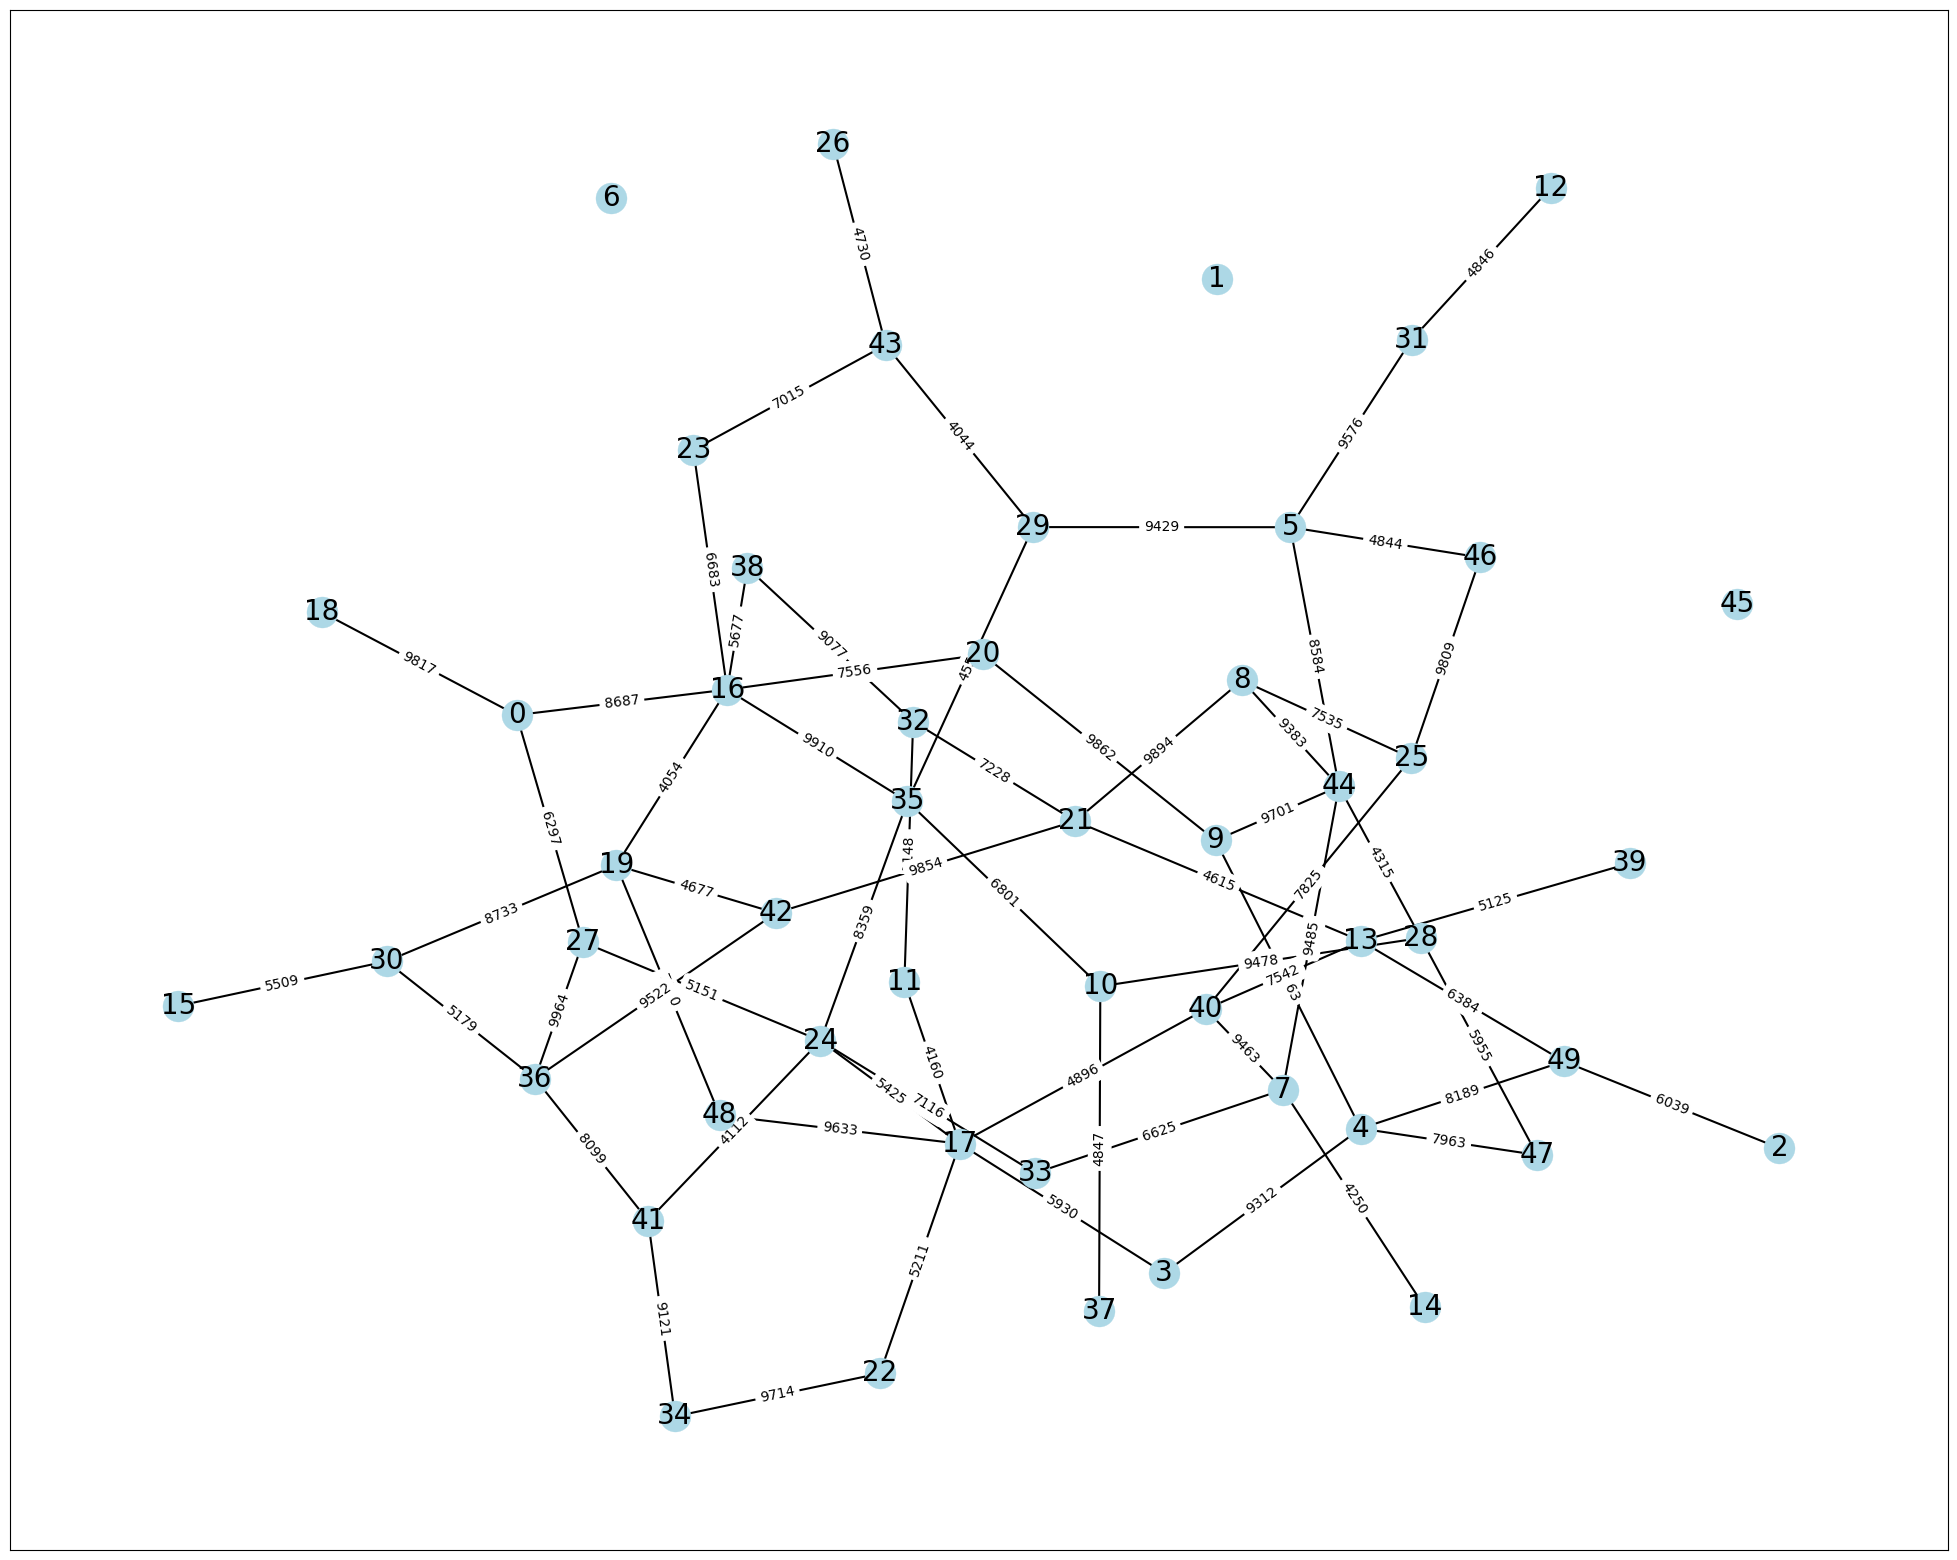

In [2]:
'''
  Visualize the large graph, G_50, and display the initial flow values
'''
links = [(u, v) for (u, v, d) in G_50.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G_50)

fig = plt.figure(1, figsize=(25, 20))                                                              # set canvas size (background)
nx.draw_networkx_nodes(G_50, pos, node_size = 500, node_color = 'lightblue', linewidths = 0.2)     # draw nodes
nx.draw_networkx_edges(G_50, pos, edgelist=links, width=1.5)                                       # draw edges

nx.draw_networkx_labels(G_50, pos, font_size=20, font_family="sans-serif")                         # node labels
edge_labels = nx.get_edge_attributes(G_50, 'flow')                                                 # edge weight labels
nx.draw_networkx_edge_labels(G_50, pos, edge_labels)

plt.show()

In [3]:
'''
  Code for hardcoded graph, representing Figure 1 graph, provided by Dr. Pears in Tutorial 2
'''
G_Fig_1 = nx.Graph()
G_Fig_1.add_edges_from([(0, 1, {'flow': 2}), (0, 1,{'capacity': 6}), (0, 2,{'flow': 3}), (0, 2,{'capacity': 3}), (0,3,{'flow': 3}), (0,3,{'capacity': 5}), (1,2, {'flow': 1}), (1,2,{'capacity': 1}), (1,4, {'flow': 1}), (1,4,{'capacity': 3}), (2,4, {'flow': 3}), (2,4,{'capacity': 7}), (2,5, {'flow': 2}), (2,5,{'capacity': 9}), (3,2, {'flow': 1}), (3,2,{'capacity': 1}), (3,5,{'flow': 2}), (3,5,{'capacity': 2}), (5,4, {'flow': 4}), (5,4,{'capacity': 5})])

<ipython-input-4-ba7e6f61c074>:5: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G_Fig_1)


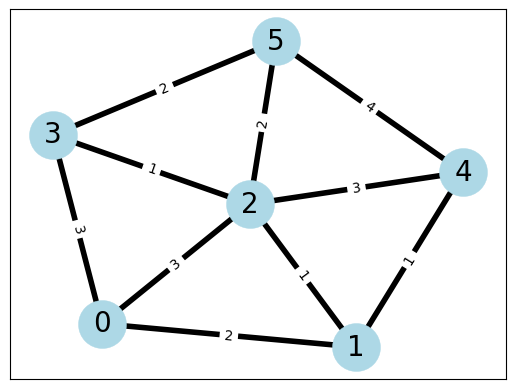

In [4]:
'''
  Visualize the small graph, G_Fig_1, and display the initial flow values
'''
links = [(u, v) for (u, v, d) in G_Fig_1.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G_Fig_1)

nx.draw_networkx_nodes(G_Fig_1, pos, node_size=1200, node_color='lightblue', linewidths=0.25)   # draw nodes
nx.draw_networkx_edges(G_Fig_1, pos, edgelist=links, width=4)                                   # draw edges

nx.draw_networkx_labels(G_Fig_1, pos, font_size=20, font_family="sans-serif")                   # node labels
edge_labels = nx.get_edge_attributes(G_Fig_1, 'flow')                                           # edge weight labels
nx.draw_networkx_edge_labels(G_Fig_1, pos, edge_labels)

plt.show()

In [5]:
'''
  Next, create the 3 functions from Milestone 1 required to implement the simulated annealing algorithm- Temperature_Schedule, Value_Function, and Find_Nearest_Neighbor

  The Temperature_Schedule accepts input k, the current iteraton, and multiplies that by T0, the initial temperature of 10,000, and the scaling factor alpha, set to 0.01.
  This formula was provided by Dr. Pears in "Notes for AI Project." The function then returns the temperature for the current iteration, Tk.
  Temperature_Schedule should begin as a large number and decrease over time, until it eventually reaches 0. We pass in k as values [99 - 0], so that each iteration the
  function returns a number 100 smaller than the previous temperature (10,000 * 0.01 = 100), for a 1% reduction each iteration.
'''
def Temperature_Schedule (k):
  T0 = 10000
  Tk = T0 * k * 0.01
  return Tk

In [6]:
'''
  The Value_Function accepts a graph and sink node as input. G.edges(sink) returns a list of all edges for the given sink node.
  We then iterate through each edge and add their flow values to an accumulator, total, which the function returns.
  Adding all flow in to the sink node will give us the maximum flow in the graph, which is how we will evaluate our SA algorithm.
'''
def Value_Function (G, sink):
  #start_total = 0
  sink_total = 0
  #start_edges = G.edges(start)
  sink_edges  = G.edges(sink)

  #for edge in start_edges:
   # temp = G.get_edge_data(*edge)
   # start_total += temp['flow']

  for edge in sink_edges:
    temp = G.get_edge_data(*edge)
    sink_total += temp['flow']
  return sink_total

In [7]:
from math import e
def Find_Next_Neighbour_1(G_50, P, start, sink, t):
  j = 20000
  ar = []
  for i in P:
    ar.append(i)
  l=len(ar)
  r = random.randint(-3000, 3000)
  k=20000
  fflag = 0

  for i in range(l-1):
    f=G_50[ar[i]][ar[i+1]]["flow"]
    c=G_50[ar[i]][ar[i+1]]["capacity"]

    if (c-f)<j:
      j=c-f
    if f<k:
      k=f

  if r<=0:
    h=0-r
    if h>k:
      flag=1
    else:
      flag=0
  else:
    if r>j:
      flag=1
    else:
      flag=0

  if flag==0:
    G_prime = G_50.copy()
    for i in range(l-1):
      G_prime[ar[i]][ar[i+1]]["flow"]=G_prime[ar[i]][ar[i+1]]["flow"]+r
      f=G_prime[ar[i]][ar[i+1]]["flow"]
      c=G_prime[ar[i]][ar[i+1]]["capacity"]

    V=Value_Function(G_50, sink)
    V_new=Value_Function(G_prime, sink)

    deltaE=V_new-V
    if deltaE>0:
      fflag = 1
    else:
      z=deltaE/t
      prob=e**z
      y=random.uniform(0,1)
      if y<prob:
        V=V_new
        fflag = 1
      else:
        fflag = 0

  return flag, fflag, r

In [8]:
from math import e
def Find_Next_Neighbour_2 (G_Fig_1, P, start, sink, t):
  j = 20000
  ar = []
  for i in P:
    ar.append(i)
  l=len(ar)
  r = random.randint(-1, 1)
  fflag = 0
  #print(r)
  k=20000
  for i in range(l-1):
    f = G_Fig_1[ar[i]][ar[i+1]]["flow"]
    c = G_Fig_1[ar[i]][ar[i+1]]["capacity"]
    if (c-f)<j:
      j=c-f
    if f<k:
      k=f
  if r<=0:
    h=0-r
    if h>k:
      #print("Error")
      flag=1
    else:
      #print("No Error")
      flag=0
  else:
    if r>j:
      #print("Error")
      flag=1
    else:
      #print("No Error")
      flag=0
  if flag==0:
    V=Value_Function(G_Fig_1, sink)
    #print("The Initial G_Value ",V)
    G_prime = G_Fig_1.copy()
    for i in range(l-1):
      G_prime[ar[i]][ar[i+1]]["flow"]=G_prime[ar[i]][ar[i+1]]["flow"]+r
      f=G_prime[ar[i]][ar[i+1]]["flow"]
      #G_prime[ar[i]][ar[i+1]]["capacity"]=G_prime[ar[i]][ar[i+1]]["capacity"]+r
      c=G_prime[ar[i]][ar[i+1]]["capacity"]
    V_new=Value_Function(G_prime, sink)
    #print("The G' Value", V_new)
    deltaE=V_new-V
    if deltaE>0:
      #G_50=G_prime.copy()
      fflag = 1
    else:
      #print(deltaE)
      z=deltaE/t
      prob=e**z
      y=random.uniform(0,1)
      if y<prob:
        #G_50=G_prime.copy
        V=V_new
        fflag = 1
      else:
        fflag = 0
      #print(prob)
  #print(V)
  return flag, fflag, r
  #for edge in edges:
   # temp = G.get_edge_data(*edge)

In [9]:
start_node = random.randint(0, 49)
sink_node = random.randint(0,49)
while sink_node == start_node:
  sink_node = random.randint(0,49)

while not nx.has_path(G_50, start_node, sink_node):
  start_node = random.randint(0, 49)
  sink_node = random.randint(0,49)
  while sink_node == start_node:
    sink_node = random.randint(0,49)

print(start_node)
print(sink_node)

all_paths = []
for path in nx.all_simple_paths(G_50, source= start_node, target= sink_node):
  all_paths.append(path)

temp_path = random.choice(all_paths)

12
33


Apply the Edmonds Karp algorithm on the test graph and print out the flow into the sink node.

In [10]:
from networkx.algorithms.flow import edmonds_karp
R = edmonds_karp(G_50, start_node, sink_node)
flow_value = nx.maximum_flow_value(G_50, start_node, sink_node)
print(flow_value)

6785
